In [75]:
import numpy as np
import argparse
import time
import cv2
import os
import matplotlib.pyplot as plt
import speech_recognition as sr
from gtts import gTTS

In [76]:
labelsPath = os.path.sep.join(["coco.names"])
LABELS = open(labelsPath).read().strip().split("\n")


In [77]:
print(LABELS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [78]:
print(LABELS[0])

person


In [79]:
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3),dtype="uint8")

In [80]:
weightsPath = 'yolov3.weights'
configPath = 'yolov3.cfg'


In [81]:
print(weightsPath)

yolov3.weights


In [82]:
configPath

'yolov3.cfg'

In [83]:
print("[INFO] loading YOLO from disk...")
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

[INFO] loading YOLO from disk...


In [84]:
image = cv2.imread('test2.jpg')
(H, W) = image.shape[:2]

In [85]:
(H, W)

(225, 225)

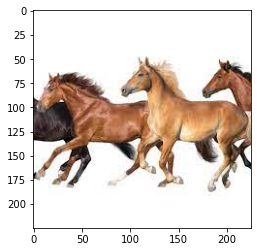

In [86]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [87]:
ln = net.getLayerNames()
ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]


In [88]:
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416),swapRB=True, crop=False)
net.setInput(blob)
start = time.time()
layerOutputs = net.forward(ln)
end = time.time()

In [89]:

print("[INFO] YOLO took {:.6f} seconds".format(end - start))

[INFO] YOLO took 0.818625 seconds


In [90]:
boxes = []
confidences = []

classIDs = []

ID = 0

In [97]:


for output in layerOutputs:

	for detection in output:

		scores = detection[5:]
		classID = np.argmax(scores)
		confidence = scores[classID]


		if confidence > 0.5:

			box = detection[0:4] * np.array([W, H, W, H])
			(centerX, centerY, width, height) = box.astype("int")




			x = int(centerX - (width / 2))
			y = int(centerY - (height / 2))


			boxes.append([x, y, int(width), int(height)])
			confidences.append(float(confidence))
            
			classIDs.append(classID)
x = classIDs

print(LABELS[classIDs[2]], confidences[2])

idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.5 ,0.3)


if len(idxs) > 0:
	list1 = []
	for i in idxs.flatten():

		(x, y) = (boxes[i][0], boxes[i][1])
		(w, h) = (boxes[i][2], boxes[i][3])
		centerx = round((2*x + w)/2)
		centery = round((2*y + h)/2)
		if centerX <= W/3:
			W_pos = "left "
		elif centerX <= (W/3 * 2):
			W_pos = "center "
		else:
			W_pos = "right "

		if centerY <= H/3:
			H_pos = "top "
		elif centerY <= (H/3 * 2):
			H_pos = "mid "
		else:
			H_pos = "bottom "
        
		list1.append(H_pos + W_pos + LABELS[classIDs[i]])
        
	description = ', '.join(list1)

	myobj = gTTS(text=description, lang="en", slow=False)

	myobj.save("object_detection.mp3")
    
os.system('start object_detection.mp3')

horse 0.6556716561317444


0

In [92]:
print(LABELS[classIDs[i]])

horse


In [93]:
type(idxs)

numpy.ndarray

In [94]:
len(idxs)

3

In [95]:
print(classID)

0


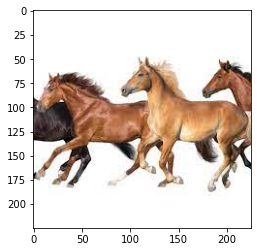

In [96]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))